<a href="https://colab.research.google.com/github/AkReposuiii/ML-labs/blob/main/prediction_of_k_medoids_clusters_of_kc_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Prediction of K-medoids clusters of KC House Sale Data**
---------------------------------------------------------


## **Import the required libraries**

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
!pip install catboost
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


## **Load the dataset**

In [22]:
df = pd.read_csv("/content/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **Data Preprocessing** <a name = 'Preprocessing'></a>

In [23]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### **Outlier Removal**

In [24]:
df.drop(15870, axis = 0, inplace = True)
# reset index, because a row is droped.
df.reset_index(drop=True, inplace = True)
df.shape

(21612, 21)

### **Checking for Missing Values**

In [25]:
df[df.columns[df.isnull().sum()>0]].isnull().sum()

,0


No missing values detected.

## **K-medoids Cluster Generation**<a name ='kmedoids'></a>

In [26]:
pip install scikit-learn-extra

In [27]:
df.drop(['date', 'id'], axis = 1, inplace = True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Clus_dataSet = scaler.fit_transform(df)
Clus_dataSet

array([[-0.86668617, -0.40692359, -1.44745951, ..., -0.30611525,
        -0.94339773, -0.26072358],
       [-0.00567521, -0.40692359,  0.17558163, ..., -0.74637458,
        -0.43272969, -0.18787744],
       [-0.98081575, -1.50829275, -1.44745951, ..., -0.13569228,
         1.07009338, -0.17238527],
       ...,
       [-0.37584455, -1.50829275, -1.77206774, ..., -0.60435544,
        -1.41029422, -0.39414664],
       [-0.38156737, -0.40692359,  0.50018986, ...,  1.02886466,
        -0.84126412, -0.42051628],
       [-0.58585659, -1.50829275, -1.77206774, ..., -0.60435544,
        -1.41029422, -0.41795257]])

In [28]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3).fit(Clus_dataSet)

In [29]:
df.insert(0, 'kmedoids Cluster Labels', kmedoids.labels_)
df.head()

,kmedoids Cluster Labels,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### **Normalize Data & Train Test split**

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [30]:
X = df.loc[:, df.columns != 'kmedoids Cluster Labels']
X.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.86668617, -0.40692359, -1.44745951, -0.97984121, -0.22832648,
        -0.91546593, -0.08717466, -0.3057672 , -0.62914619, -0.55885272,
        -0.73474634, -0.65864212, -0.5449314 , -0.21013346,  1.87013949,
        -0.35252787, -0.30611525, -0.94339773, -0.26072358],
       [-0.00567521, -0.40692359,  0.17558163,  0.53360192, -0.18989137,
         0.93645991, -0.08717466, -0.3057672 , -0.62914619, -0.55885272,
         0.46079706,  0.2451683 , -0.68111108,  4.74656291,  0.87957332,
         1.16160686, -0.74637458, -0.43272969, -0.18787744],
       [-0.98081575, -1.50829275, -1.44745951, -1.42625249, -0.12330593,
        -0.91546593, -0.08717466, -0.3057672 , -0.62914619, -1.40959054,
        -1.22987038, -0.65864212, -1.29391966, -0.21013346, -0.93334967,
         1.28357482, -0.13569228,  1.07009338, -0.17238527],
       [ 0.17409931,  0.69444556,  1.14940631, -0.13057096, -0.2440192 ,
        -0.91546593, -0.08717466, -0.3057672 ,  2.44468843, -0.55885272,
        -0.891

In [32]:
y = df["kmedoids Cluster Labels"]
y.head()

,kmedoids Cluster Labels
0,1
1,0
2,2
3,0
4,2


### **Waffle chart to visualize K-medoids Cluster properties**

In [33]:
pip install pywaffle

##### **Number of houses in each Cluster**

In [34]:
Count =  df.groupby(["kmedoids Cluster Labels"], as_index=False).count()[["kmedoids Cluster Labels", "price"]]
Count.columns = ["kmedoids Cluster Labels", "Count"]
Count

,kmedoids Cluster Labels,Count
0,0,6776
1,1,7964
2,2,6872


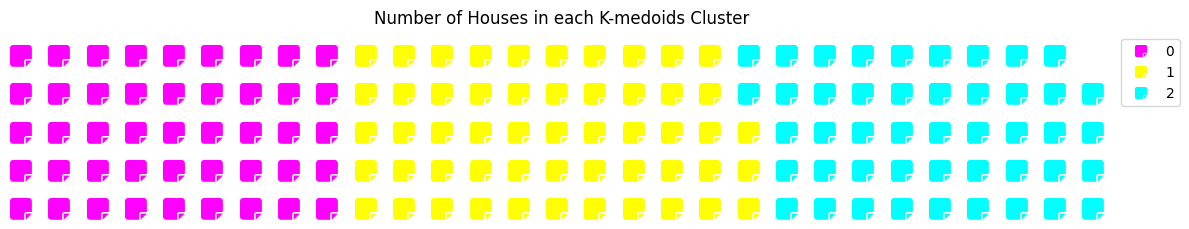

In [35]:
from pywaffle import Waffle
fig = plt.figure(
    FigureClass=Waffle,
    figsize=(12, 8),
    rows=5,
    values=list(Count.Count/150),
    colors=("magenta", "yellow", "cyan"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='sticky-note', icon_size=18,
    icon_legend=True,
    title={'label': 'Number of Houses in each K-medoids Cluster', 'loc': 'center'},
    labels=list(Count['kmedoids Cluster Labels']))

##### **Average House Sale price of each cluster**

In [36]:
labels =  df.groupby(["kmedoids Cluster Labels"], as_index=False).mean()[["kmedoids Cluster Labels", "price"]]
labels

,kmedoids Cluster Labels,price
0,0,783367.394923
1,1,327354.355977
2,2,546731.293510


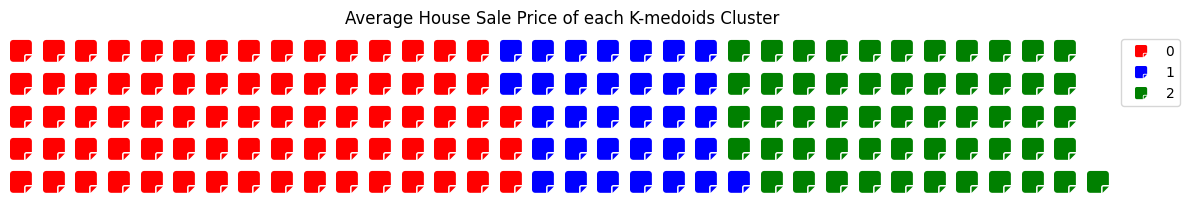

In [37]:
from pywaffle import Waffle
fig = plt.figure(
    FigureClass=Waffle,
    figsize=(12, 8),
    rows=5,
    values=list(labels.price/10000),
    colors=("red", "blue", "green"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='sticky-note', icon_size=18,
    icon_legend=True,
    title={'label': 'Average House Sale Price of each K-medoids Cluster', 'loc': 'center'},
    labels=list(labels['kmedoids Cluster Labels']))

In [45]:


from sklearn.metrics import accuracy_score
accuracy_score(y, kmedoids.labels_)


1.0

# **Interpretation:**





*   The dataset contains information about houses sold in King County, Washington.
*    This data can be used to analyze housing market trends, predict house prices, and identify factors that influence house values.


*   The dataset has no missing values, but outliers were removed.
*   K-medoids clustering was applied to group similar houses based on their features.


*   The resulting clusters can be used to understand different segments of the housing market.



*    Various classification models were trained to predict the cluster labels of new houses.
*   KNN with k=3 was found to be the best performing model.


*  This indicates that houses with similar characteristics tend to fall into the same cluster








